In [6]:
from scoredriven import *

## Real Data

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
df = pd.read_csv('../../../Killzone_NQ_w_fea.csv')[['Killzone', 'Day','Volatility', 'Returns Mean']]


In [81]:
df['vol'] = (df['Volatility']*100)

<Axes: >

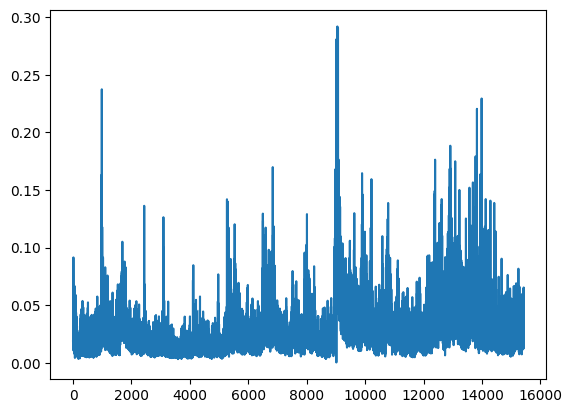

In [83]:
df.vol.plot()

In [23]:
series = df['ret']
train_size=200
test_size=8
end_train = 100 + train_size
end_test = end_train + test_size
train_set = series.iloc[100:end_train]
test_set = series.iloc[end_train:end_test]


train = train_set.values
test = test_set.values

In [55]:
def train_predict_univariate_scoredriven(series, target, train_size=200, test_size=8):
    series = series[target]
    max_start_index = len(series) - train_size - test_size + 1
    preds = []
    for start in range(0, max_start_index, test_size): 
        print(start)
        end_train = start + train_size
        end_test = end_train + test_size
        train_set = series.iloc[start:end_train]
        test_set = series.iloc[end_train:end_test]

        
        train = train_set.values
        test = test_set.values
        est = uDCS_t_model_estimator(train, theta)


        #filtered = uDCS_t_model_filter(train, est['theta'])
        theta_list = est['theta_list']
        theta_list_values = list(theta_list.values())
        
        
        pred = pd.Series(uDCS_t_model_predict(test, theta_list_values,  test_size))
        a = pd.Series(test)#.plot()
        b = pd.Series(pred)#.plot()
        df = pd.concat([a, b], axis = 1)
        df.columns = ['test', 'pred']
        preds.append(df)

    return preds

In [84]:
ss = train_predict_univariate_scoredriven(df, 'vol', train_size=200, test_size=8)

0
8
16
24
32
40
48
56
64
72
80
88
96
104
112
120
128
136
144
152
160
168
176
184
192
200
208
216
224
232
240
248
256
264
272
280
288
296
304
312
320
328
336
344
352
360
368
376
384
392
400
408
416
424
432
440
448
456
464
472
480
488
496
504
512
520
528
536
544
552
560
568
576
584
592
600
608
616
624
632
640
648
656
664
672
680
688
696
704
712
720
728
736
744
752
760
768
776
784
792
800
808
816
824
832
840
848
856
864
872
880
888
896
904
912
920
928
936
944
952
960
968
976
984
992
1000
1008
1016
1024
1032
1040
1048
1056
1064
1072
1080
1088
1096
1104
1112
1120
1128
1136
1144
1152
1160
1168
1176
1184
1192
1200
1208
1216
1224
1232
1240
1248
1256
1264
1272
1280
1288
1296
1304
1312
1320
1328
1336
1344
1352
1360
1368
1376
1384
1392
1400
1408
1416
1424
1432
1440
1448
1456
1464
1472
1480
1488
1496
1504
1512
1520
1528
1536
1544
1552
1560
1568
1576
1584
1592
1600
1608
1616
1624
1632
1640
1648
1656
1664
1672
1680
1688
1696
1704
1712
1720
1728
1736
1744
1752
1760
1768
1776
1784
1792
1800
1808
1816


In [87]:
final_res = pd.concat(ss).reset_index()

<Axes: >

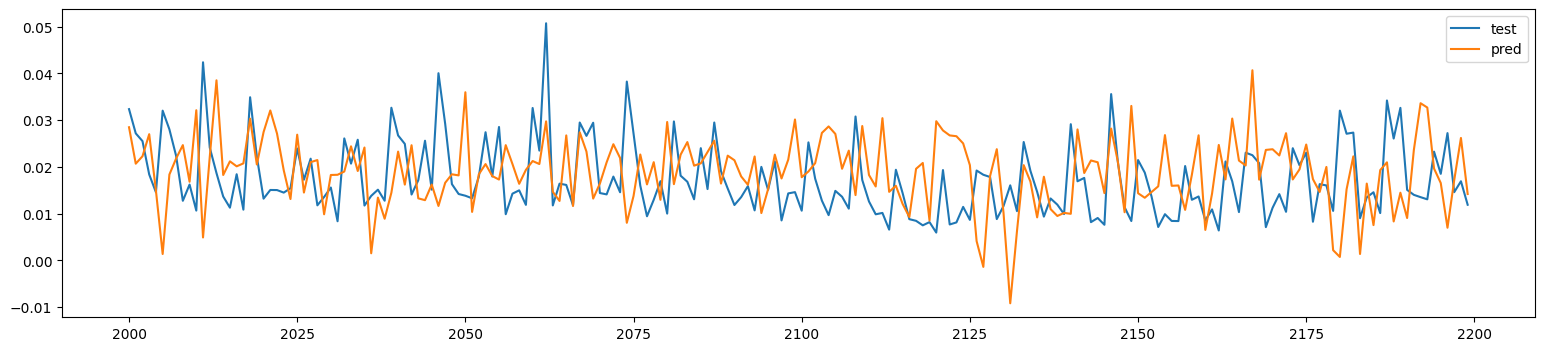

In [89]:
final_res[['test','pred']][2000:2200].plot(figsize=(19,4))

In [90]:
final_res[['test','pred']].to_csv('./vol_scoredriven.csv')

{'omega': 7.439625678425071e-05, 'phi': 0.7999859879330234, 'k': 0.7996703176255752, 'varsigma': 1e-05, 'nu': 8.771456740947706}


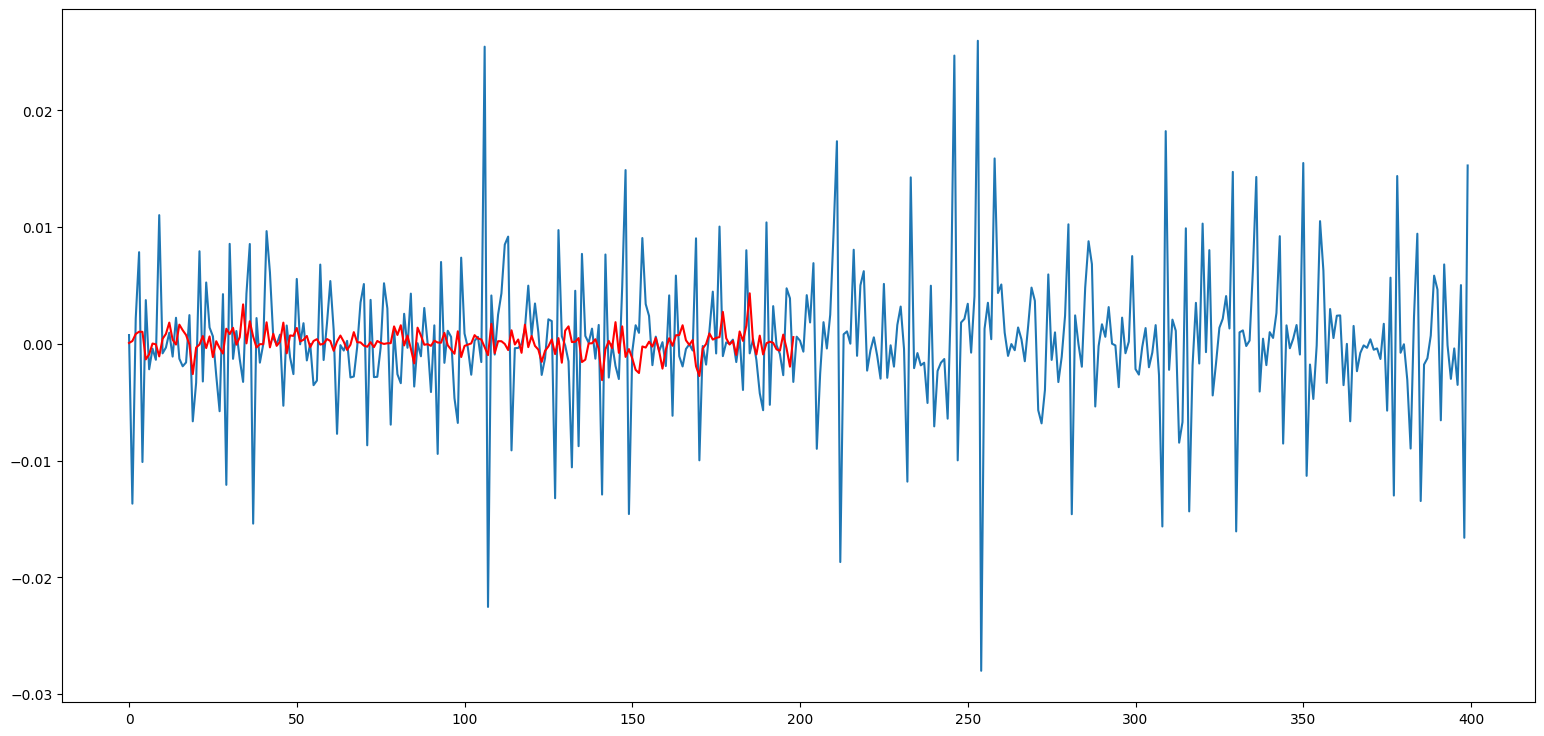

In [26]:
#volatilita' media al quadrato come valore iniziale
# arma + garch
# score driven location + beta-t-garch
omega = 0
phi = 0.8 #6-7
k = 0.8
varsigma = 1
nu = 8 

theta = [omega, phi, k, varsigma, nu]

est = uDCS_t_model_estimator(train, theta)
theta_list = est['theta_list']
print(theta_list)

filtered = uDCS_t_model_filter(train, est['theta'])
plt.figure(figsize=(19,9))
plt.plot(dati)
plt.plot(pd.DataFrame(filtered['Dynamic_Location']), color='red')
plt.show()

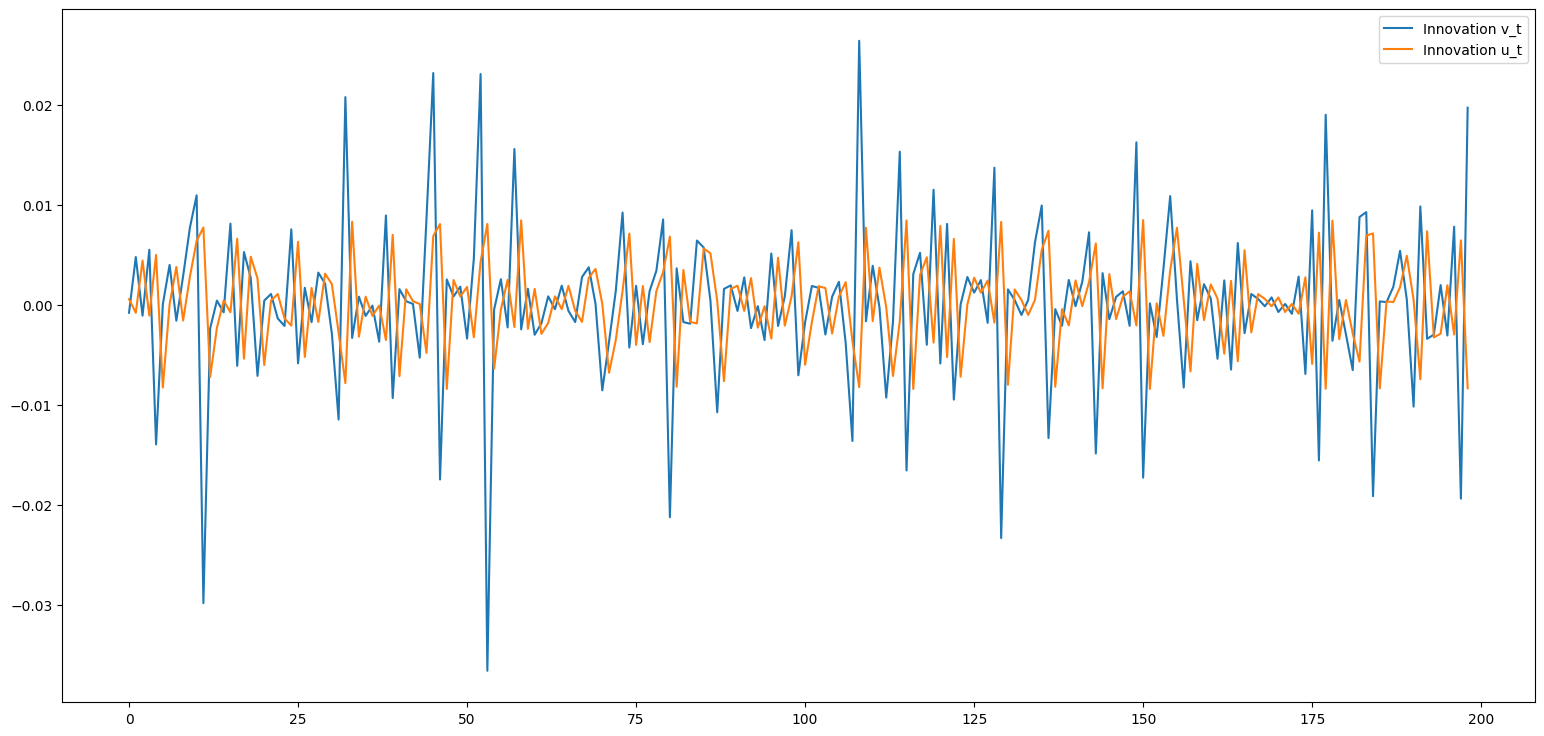

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'filtered' contains the filtered data

# Plotting the data and assigning labels
plt.figure(figsize=(19,9))
plt.plot(pd.DataFrame(filtered['Innovation_v_t']).rename(columns={0: 'V_t'}), label='Innovation v_t')
plt.plot(pd.DataFrame(filtered['Innovation_u_t']).rename(columns={0: 'U_t'}), label='Innovation u_t')

# Adding a legend
plt.legend()
# Display the plot
plt.show()

array([[<Axes: title={'center': '0'}>]], dtype=object)

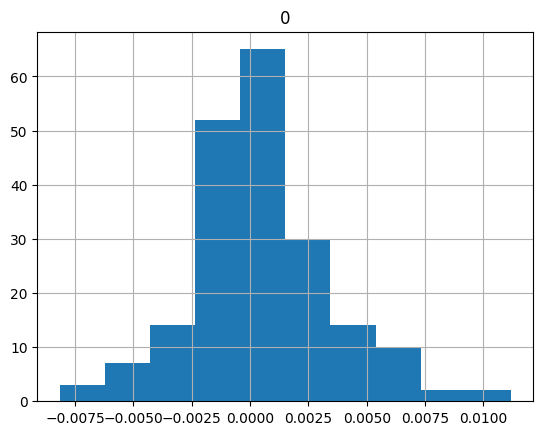

In [10]:
pd.DataFrame(filtered['Dynamic_Location']).hist(bins = 10)

In [27]:
theta

[0, 0.8, 0.8, 1, 8]

C:\Users\AE452\AppData\Local\Temp\ipykernel_12848\2321236351.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions[t - T] = y_pred


<Axes: >

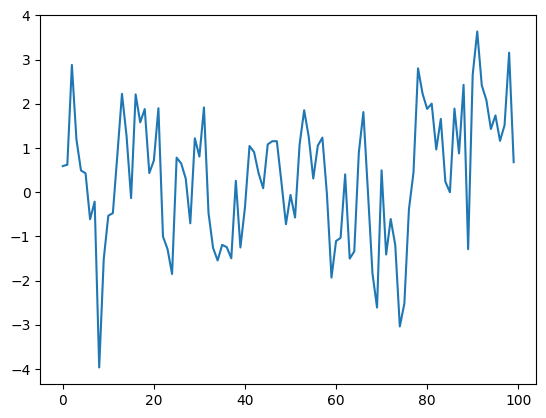

In [12]:
pd.Series(uDCS_t_model_predict(dati, theta,  100)).plot()